## **Problem statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/csv files/ola.csv')

In [ ]:
df.shape

(19104, 14)

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0           0  01/01/19          1  28.0     0.0  C23                2   
1           1  02/01/19          1  28.0     0.0  C23                2   
2           2  03/01/19          1  28.0     0.0  C23                2   
3           3  11/01/20          2  31.0     0.0   C7                2   
4           4  12/01/20          2  31.0     0.0   C7                2   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387      24/12/18             NaN                    1      1   
1   57387      24/12/18             NaN                    1      1   
2   57387      24/12/18        03/11/19                    1      1   
3   67016      11/06/20             NaN                    2      2   
4   67016      11/06/20             NaN                    2      2   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               -665480                 2  
2                     0                 2  
3                     0                 1  
4                     0                 1

In [ ]:
df.dtypes

Unnamed: 0                int64
MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
df['report_month']=df['MMM-YY'].dt.month
df['report_year']=df['MMM-YY'].dt.year
df['joining_month']=df['Dateofjoining'].dt.month
df['joining_year']=df['Dateofjoining'].dt.year
df['last_working_month']=df['LastWorkingDate'].dt.month
df['last_working_year']=df['LastWorkingDate'].dt.year
df['report_day']=df['MMM-YY'].dt.day
df['joining_day']=df['Dateofjoining'].dt.day
df['last_working_day']=df['LastWorkingDate'].dt.day



<ipython-input-8-89ec289ff777>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
<ipython-input-8-89ec289ff777>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])
<ipython-input-8-89ec289ff777>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])


In [ ]:
df.drop('MMM-YY', axis=1, inplace=True)
df.drop('Dateofjoining', axis=1, inplace=True)
df.drop('LastWorkingDate', axis=1, inplace=True)

In [ ]:
df.nunique()

Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
report_month               12
report_year                 2
joining_month              12
joining_year                8
last_working_month         12
last_working_year           3
report_day                  1
joining_day                31
last_working_day           31
dtype: int64

In [ ]:
df.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'report_month', 'report_year', 'joining_month',
       'joining_year', 'last_working_month', 'last_working_year', 'report_day',
       'joining_day', 'last_working_day'],
      dtype='object')

In [ ]:
agg={'Driver_ID':'first', 'Age':np.mean, 'Gender':'first', 'City':'first', 'Education_Level':np.mean, 'Income':np.mean,
       'Joining Designation':'first', 'Grade':'last', 'Total Business Value':np.mean,
       'Quarterly Rating':np.mean, 'report_month':'last', 'report_year':'last', 'joining_month':'first',
       'joining_year':'first', 'last_working_month':'last', 'last_working_year':'last', 'report_day':'last',
       'joining_day':'first', 'last_working_day':'last'}

In [ ]:
dg=df.groupby('Driver_ID').agg(agg)

<ipython-input-13-ba21a712b00f>:1: FutureWarning: The provided callable <function mean at 0x798e116dbd90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dg=df.groupby('Driver_ID').agg(agg)


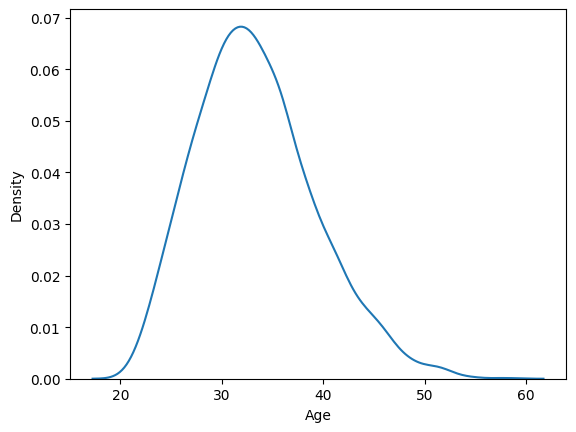

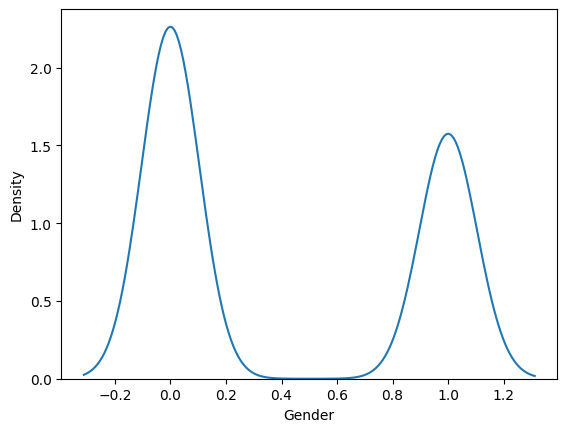

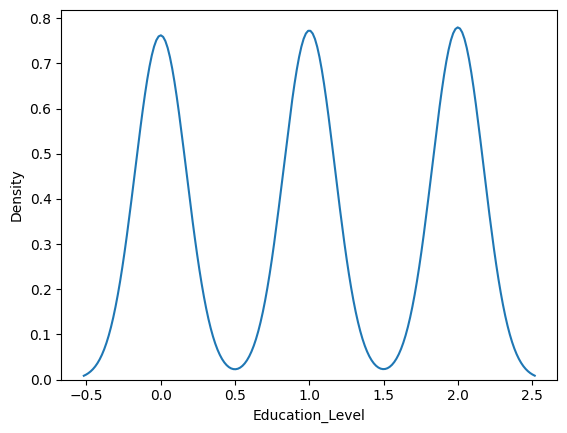

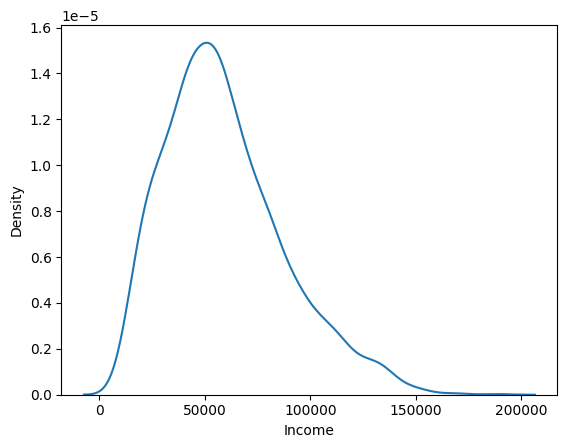

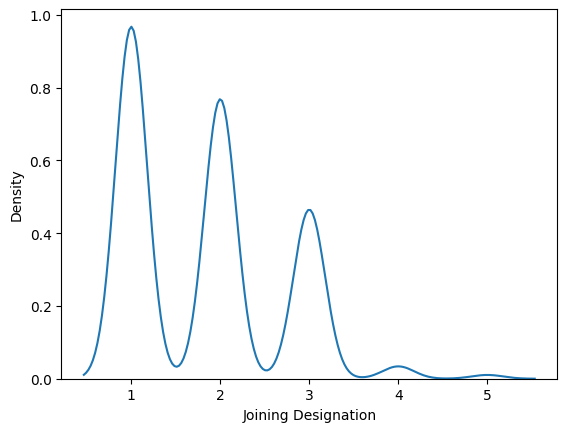

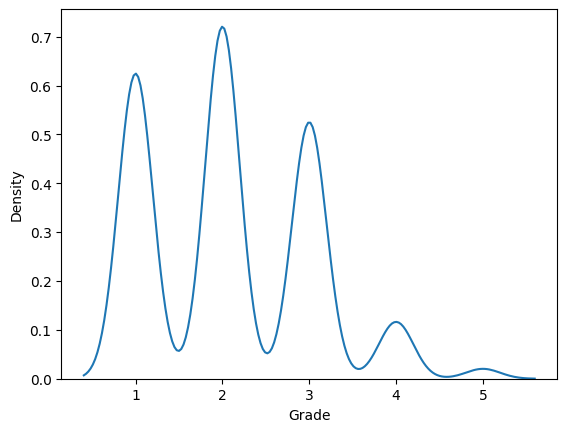

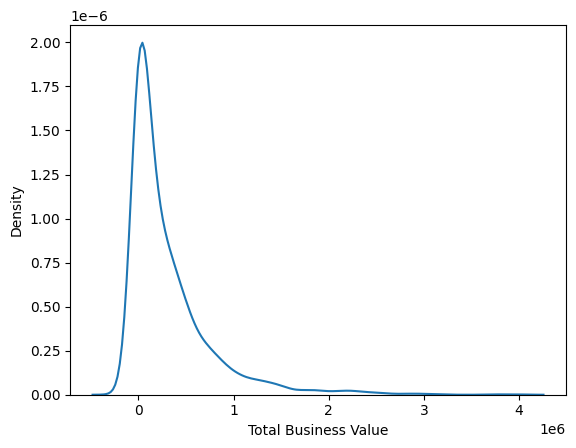

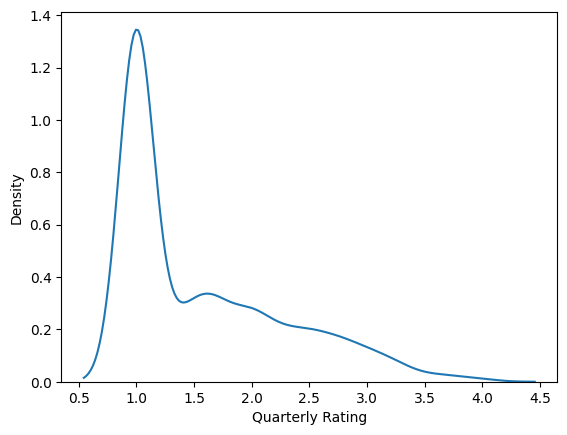

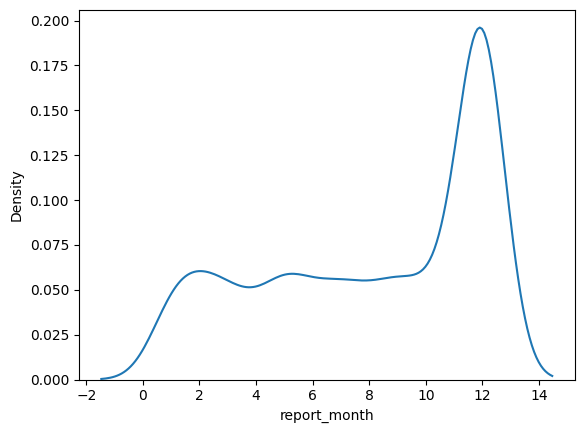

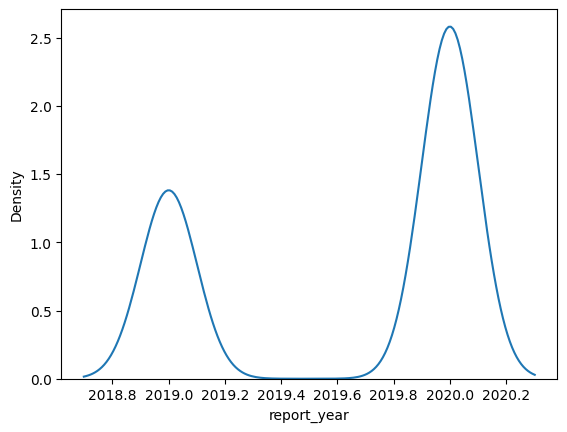

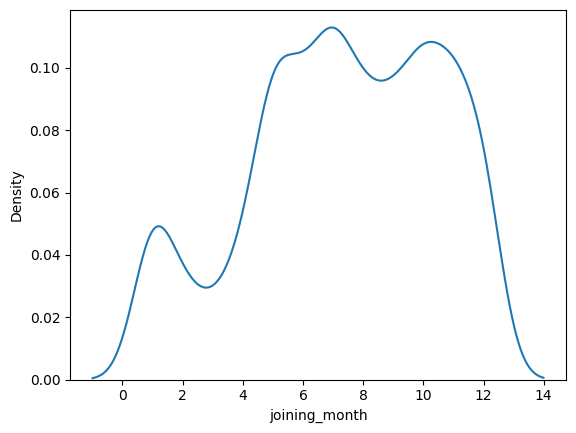

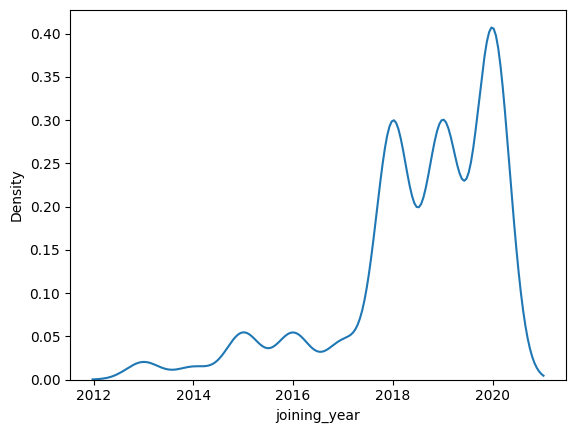

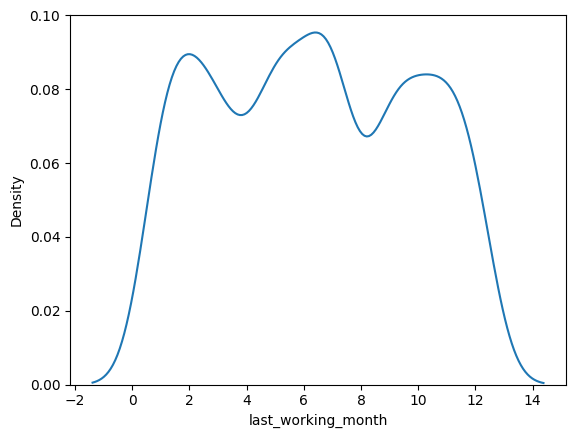

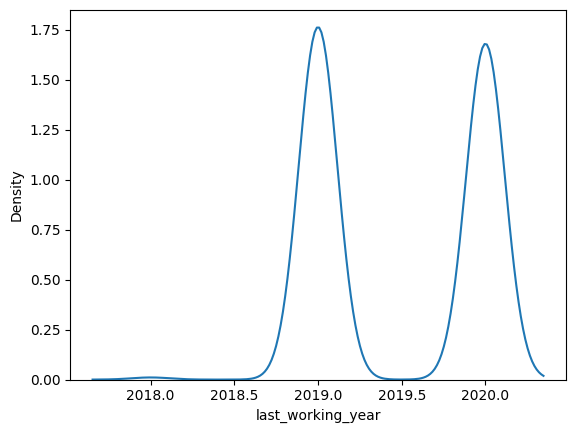

<ipython-input-14-1501a2e9c4a4>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(dg[i])


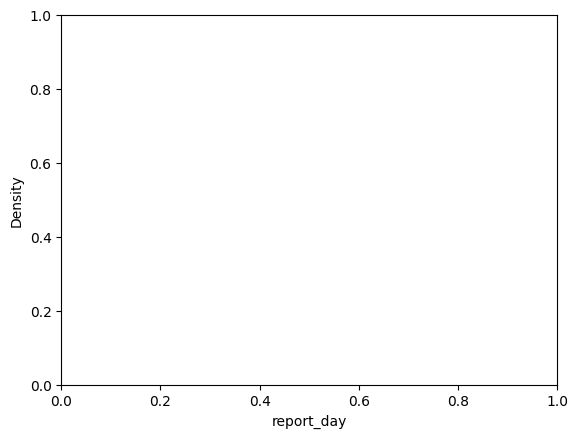

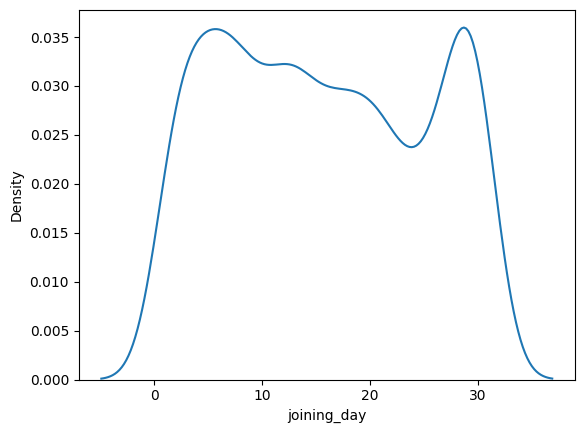

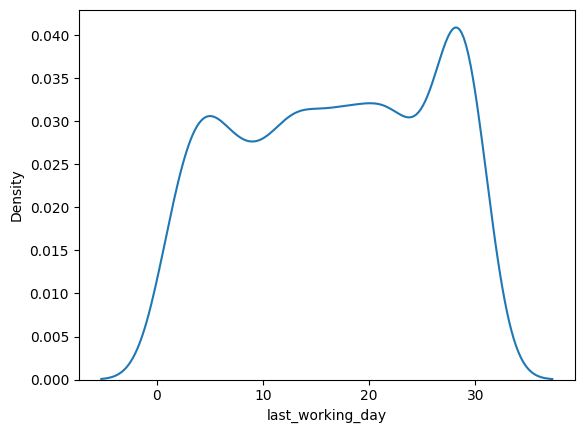

In [ ]:
for i in dg.columns:
  if i!='Driver_ID' and i!='City':
    sns.kdeplot(dg[i])
    plt.show()

<Axes: xlabel='Count', ylabel='City'>

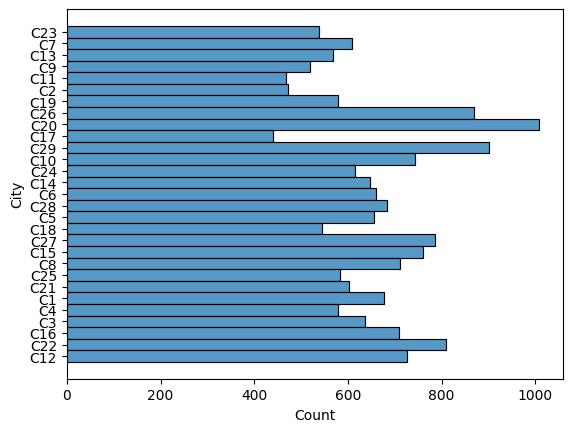

In [ ]:
sns.histplot(y=df['City'])

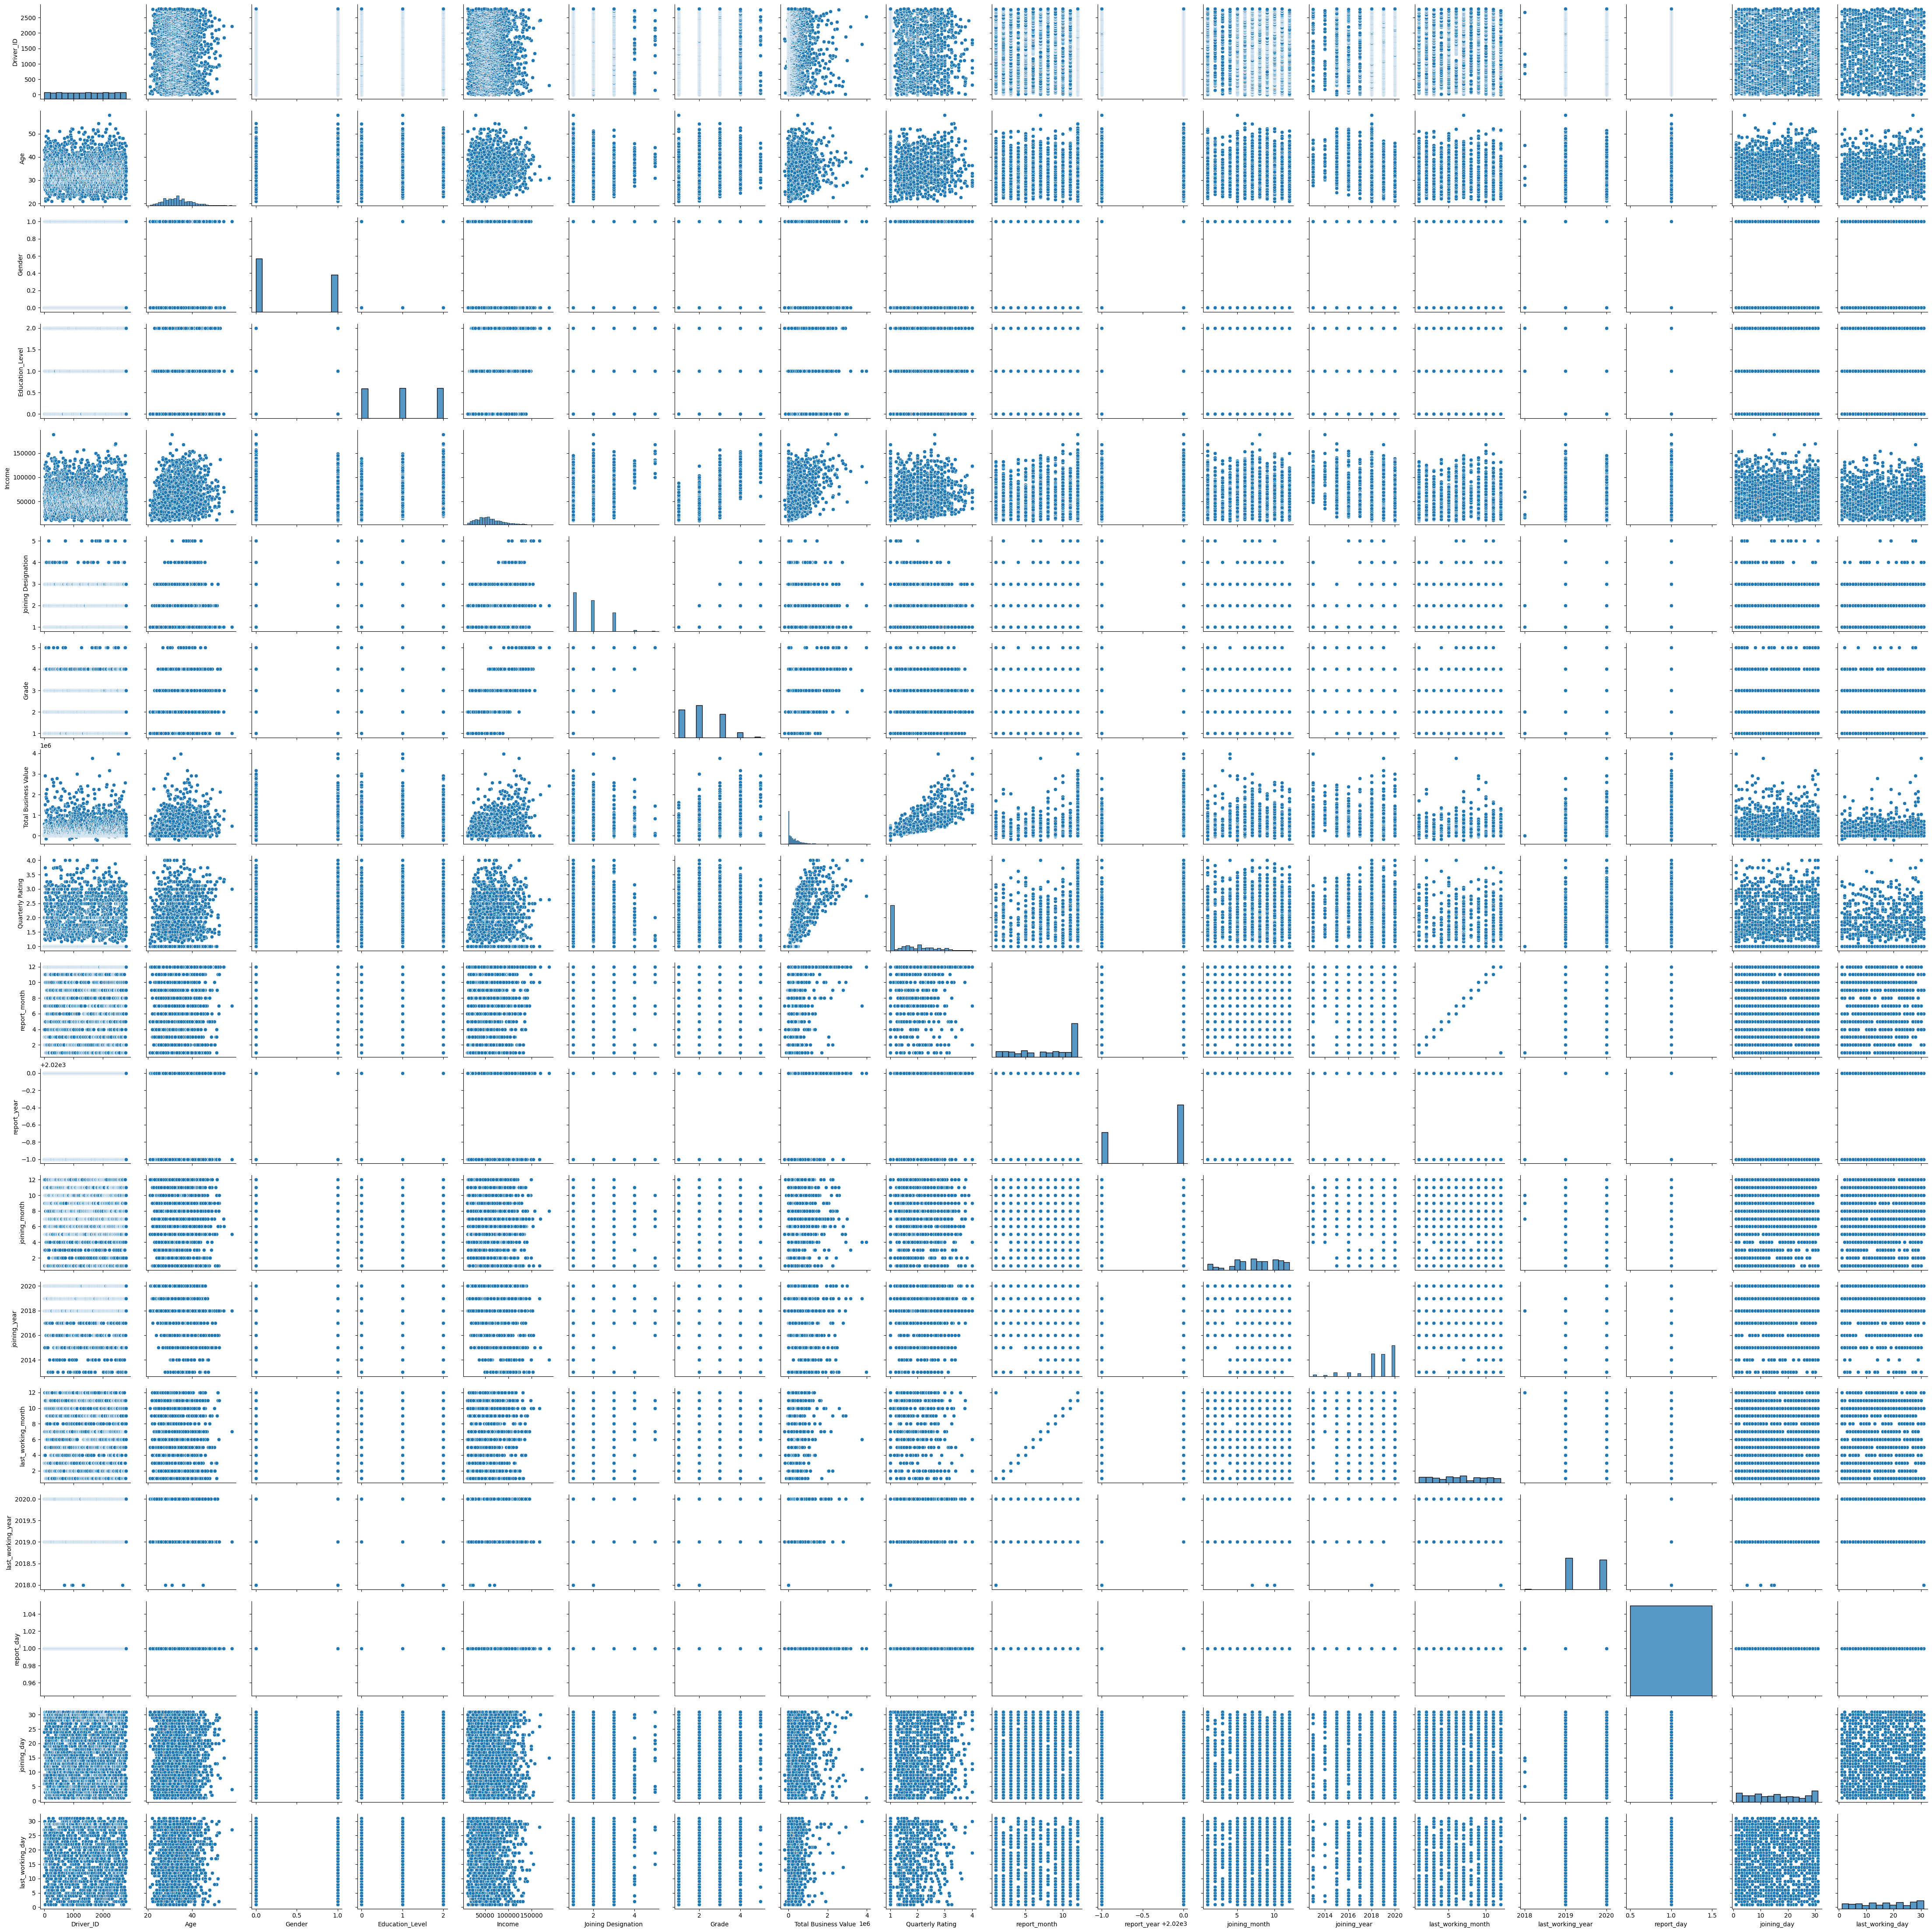

In [ ]:
sns.pairplot(data=dg)

In [ ]:
dg['churn']=(~dg['last_working_year'].isnull()).astype('int')

<Axes: >

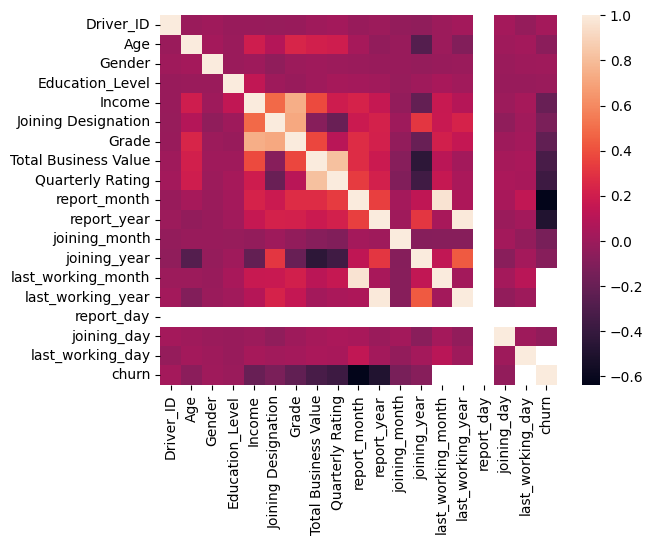

In [ ]:
num_cols=dg.select_dtypes(include=np.number).columns
sns.heatmap(dg[num_cols].corr())

## **Missing Values and Outliers**

In [ ]:
dg.isnull().sum()

Driver_ID                 0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
report_month              0
report_year               0
joining_month             0
joining_year              0
last_working_month      765
last_working_year       765
report_day                0
joining_day               0
last_working_day        765
churn                     0
dtype: int64

In [ ]:
dg.drop(['last_working_day', 'last_working_month', 'last_working_year'], axis=1, inplace=True)

In [ ]:
data=pd.get_dummies(dg, columns=['City'])

In [ ]:
y=data['churn']
x=data.drop('churn', axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [ ]:
x.describe()

Driver_ID           Age        Gender  Education_Level  \
count  2.381000e+03  2.381000e+03  2.381000e+03     2.381000e+03   
mean  -1.909901e-16  3.312484e-16 -2.909614e-17     8.952659e-18   
std    1.000210e+00  1.000210e+00  1.000210e+00     1.000210e+00   
min   -1.732720e+00 -2.100290e+00 -8.341876e-01    -1.234575e+00   
25%   -8.716696e-01 -7.419008e-01 -8.341876e-01    -1.234575e+00   
50%    3.028554e-03 -6.270634e-02 -8.341876e-01    -9.263175e-03   
75%    8.715232e-01  6.164881e-01  1.198771e+00     1.216049e+00   
max    1.725129e+00  4.182259e+00  1.198771e+00     1.216049e+00   

             Income  Joining Designation         Grade  Total Business Value  \
count  2.381000e+03         2.381000e+03  2.381000e+03          2.381000e+03   
mean  -8.952659e-17        -8.803448e-17 -1.387662e-16         -1.025826e-16   
std    1.000210e+00         1.000210e+00  1.000210e+00          1.000210e+00   
min   -1.713735e+00        -9.750218e-01 -1.164953e+00         -1.134695e+00   
25%   -7.114473e-01        -9.750218e-01 -1.164953e+00         -6.943314e-01   
50%   -1.395243e-01         2.136760e-01 -1.026194e-01         -3.592203e-01   
75%    5.868224e-01         2.136760e-01  9.597141e-01          2.612228e-01   
max    4.566107e+00         3.779769e+00  3.084381e+00          8.142907e+00   

       Quarterly Rating  report_month  ...      City_C27      City_C28  \
count      2.381000e+03  2.381000e+03  ...  2.381000e+03  2.381000e+03   
mean       2.760403e-16 -1.477189e-16  ... -3.282642e-17  3.879486e-17   
std        1.000210e+00  1.000210e+00  ...  1.000210e+00  1.000210e+00   
min       -7.870792e-01 -1.841192e+00  ... -1.970551e-01 -1.888589e-01   
25%       -7.870792e-01 -8.135601e-01  ... -1.970551e-01 -1.888589e-01   
50%       -7.870792e-01  2.140721e-01  ... -1.970551e-01 -1.888589e-01   
75%        6.027733e-01  9.847962e-01  ... -1.970551e-01 -1.888589e-01   
max        3.382478e+00  9.847962e-01  ...  5.074723e+00  5.294958e+00   

           City_C29       City_C3       City_C4       City_C5       City_C6  \
count  2.381000e+03  2.381000e+03  2.381000e+03  2.381000e+03  2.381000e+03   
mean  -2.387376e-17  3.879486e-17 -1.790532e-17 -3.879486e-17 -1.715926e-17   
std    1.000210e+00  1.000210e+00  1.000210e+00  1.000210e+00  1.000210e+00   
min   -2.049710e-01 -1.888589e-01 -1.828118e-01 -1.864604e-01 -1.840350e-01   
25%   -2.049710e-01 -1.888589e-01 -1.828118e-01 -1.864604e-01 -1.840350e-01   
50%   -2.049710e-01 -1.888589e-01 -1.828118e-01 -1.864604e-01 -1.840350e-01   
75%   -2.049710e-01 -1.888589e-01 -1.828118e-01 -1.864604e-01 -1.840350e-01   
max    4.878738e+00  5.294958e+00  5.470108e+00  5.363068e+00  5.433750e+00   

            City_C7       City_C8       City_C9  
count  2.381000e+03  2.381000e+03  2.381000e+03  
mean  -4.476330e-17 -3.058825e-17 -5.968440e-18  
std    1.000210e+00  1.000210e+00  1.000210e+00  
min   -1.815814e-01 -1.970551e-01 -1.803437e-01  
25%   -1.815814e-01 -1.970551e-01 -1.803437e-01  
50%   -1.815814e-01 -1.970551e-01 -1.803437e-01  
75%   -1.815814e-01 -1.970551e-01 -1.803437e-01  
max    5.507172e+00  5.074723e+00  5.544968e+00  

[8 rows x 44 columns]

In [ ]:
x.drop('Driver_ID', axis=1, inplace=True)

## **Training the data**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
RandomForestParams={'n_estimators':[100,200,300,500,800] , 'criterion':['gini','entropy', 'logloss'], 'min_samples_split':[2, 3, 5,7]}
GradientBootParams={'loss':['logloss', 'exponential'], 'learning_rate':[0.05, 0.1], 'n_estimators':[100,300,500,700],  'min_samples_split':[2,3,5,7]}

In [ ]:
def classification_report(y_test, x_test, clf):
  print("Precision:", precision_score(y_test, clf.predict(x_test)), "\n")
  print("Recall:", recall_score(y_test, clf.predict(x_test)), "\n")
  print("Accuracy:", accuracy_score(y_test, clf.predict(x_test)), "\n")
  print("F1 Score:", f1_score(y_test, clf.predict(x_test)), "\n")
  print("Confusion Matrix:\n", confusion_matrix(y_test, clf.predict(x_test)), "\n")

In [ ]:

forest=RandomForestClassifier()
gb=GradientBoostingClassifier()
clf1=RandomizedSearchCV(forest, RandomForestParams, cv=5, n_jobs=-1)
clf1.fit(train_x, train_y)
clf2=RandomizedSearchCV(gb, GradientBootParams, cv=5, n_jobs=-1)
clf2.fit(train_x, train_y)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'loss': ['logloss', 'exponential'],
                                        'min_samples_split': [2, 3, 5, 7],
                                        'n_estimators': [100, 300, 500, 700]})

In [ ]:
classification_report(test_y, test_x, clf1)

Precision: 0.9752321981424149 

Recall: 0.963302752293578 

Accuracy: 0.9580712788259959 

F1 Score: 0.9692307692307692 

Confusion Matrix:
 [[142   8]
 [ 12 315]] 



In [ ]:
classification_report(test_y, test_x,clf2)

Precision: 0.9752321981424149 

Recall: 0.963302752293578 

Accuracy: 0.9580712788259959 

F1 Score: 0.9692307692307692 

Confusion Matrix:
 [[142   8]
 [ 12 315]] 



Both models have nearly the same performance across all metrics

In [ ]:
model=clf1.best_estimator_

## **Feature Importance**

<ipython-input-62-bdd19bd801e6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")


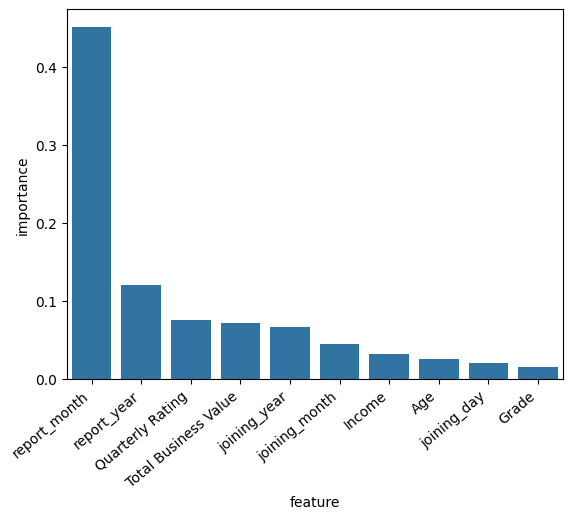

In [ ]:
data={'feature':x.columns, 'importance':model.feature_importances_}
d=pd.DataFrame(data)
feature_importance=d.sort_values(by='importance', key=abs, ascending=False)
plot=sns.barplot(data=feature_importance, x=feature_importance['feature'][0:10], y=feature_importance['importance'][0:10])
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.show()

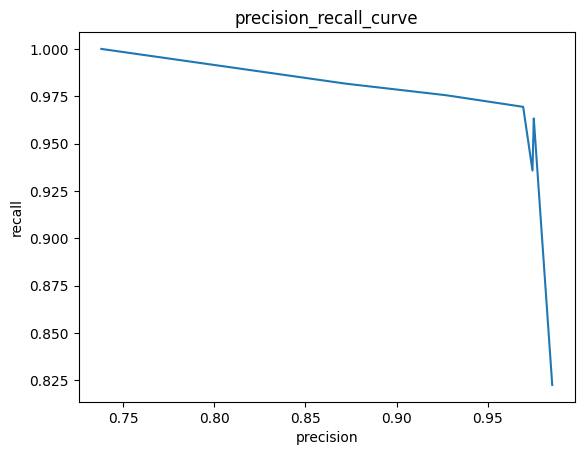

In [ ]:
def precision_recall(y_test, x_test, clf):
  proba=clf.best_estimator_.predict_proba(x_test)
  precision=[]
  recall=[]
  for i in [0.1,0.2,0.30, .4,0.5,0.6,0.7,0.8,0.9]:
    y_pred=np.where(proba[:,1]>i, 1, 0)
    r=recall_score(y_test, y_pred)
    p=precision_score(y_test, y_pred)
    precision.append(p)
    recall.append(r)
  return precision, recall

curve=precision_recall(test_y, test_x, clf1)

sns.lineplot(x=curve[0], y=curve[1])
plt.title('precision_recall_curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()

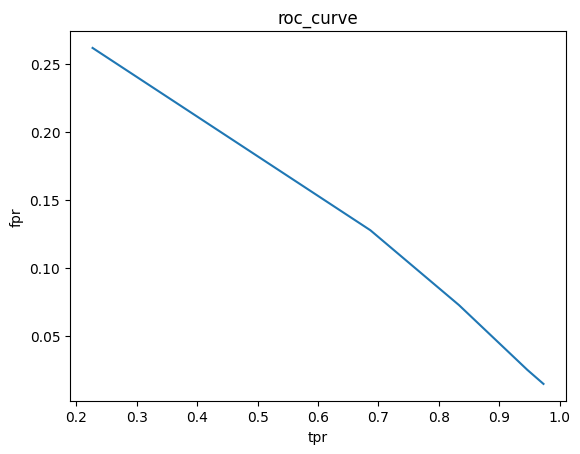

In [ ]:
from sklearn.metrics import confusion_matrix
def roc_curve(y_test, x_test):
  proba=clf1.best_estimator_.predict_proba(x_test)
  tpr=[]
  fpr=[]
  for i in [0.1,0.2,0.3, .4,0.5,0.6,0.7,0.8,0.9]:
    y_pred=np.where(proba[:,1]>i, 1, 0)
    t=confusion_matrix(y_test, y_pred)[0,0]/(confusion_matrix(y_test, y_pred)[0,0]+confusion_matrix(y_test, y_pred)[0,1])
    r=confusion_matrix(y_test, y_pred)[0,1]/(confusion_matrix(y_test, y_pred)[0,1]+confusion_matrix(y_test, y_pred)[1,1])
    tpr.append(t)
    fpr.append(r)

  return tpr, fpr

curve=roc_curve(test_y, test_x)

sns.lineplot(x=curve[0], y=curve[1])
plt.title('roc_curve')
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

# **Insights and Recommendations**

1. The ten most important features in determining driver churn are report_month, report_year, Total Business Value, Quarterly Rating, joining_year, joining_month, Income, Age, joining_day and Grade

2. Either model here can be reliably used to predict driver churn, as the obtained performance scores are Precision: 0.9752321981424149, Recall: 0.963302752293578 , Accuracy: 0.9580712788259959 , F1 Score: 0.9692307692307692

3. The addition of a few feature like the average customer rating of the driver, average number of cancelled booking, fuel expenses of the driver would be insightful in improving the model